YouTube Streamer Analysis
by Oluyemisi Awolade

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filepath='/content/drive/MyDrive/YouTube/youtubers_df.csv'


In [3]:
df = pd.read_csv(filepath)
df.head(10)


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [4]:
print(df.dtypes)




Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object


In [5]:
df.rename(columns={'Suscribers':'Subscribers'}, inplace=True)
df.head(3)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...


In [6]:
df_group_one= df[['Categories','Country','Subscribers']]
grouped1= df_group_one.groupby(['Categories','Country'],as_index=False).mean()
grouped1


,Categories,Country,Subscribers
0,ASMR,Estados Unidos,1.520000e+07
1,"ASMR, Comida y bebida",Estados Unidos,1.300000e+07
2,Animación,Argentina,2.570000e+07
3,Animación,Brasil,1.466667e+07
4,Animación,Estados Unidos,1.465000e+07
...,...,...,...
167,Vlogs diarios,India,1.664615e+07
168,Vlogs diarios,Indonesia,1.780000e+07
169,Vlogs diarios,Pakistán,1.200000e+07
170,Vlogs diarios,Turquía,1.565000e+07


In [7]:
grouped1_pivot= grouped1.pivot(index='Categories',columns='Country')
grouped1_pivot


Subscribers                          \
Country                            Arabia Saudita     Argelia   Argentina   
Categories                                                                  
ASMR                                          NaN         NaN         NaN   
ASMR, Comida y bebida                         NaN         NaN         NaN   
Animación                                     NaN         NaN  25700000.0   
Animación, Humor                              NaN         NaN         NaN   
Animación, Humor, Juguetes                    NaN         NaN         NaN   
Animación, Juguetes                           NaN         NaN         NaN   
Animación, Videojuegos                 13600000.0         NaN         NaN   
Animales y mascotas                           NaN         NaN         NaN   
Belleza, Moda                                 NaN         NaN         NaN   
Ciencia y tecnología                          NaN         NaN         NaN   
Coches y vehículos                            NaN         NaN         NaN   
Comida y bebida                               NaN         NaN         NaN   
Comida y bebida, Juguetes                     NaN         NaN         NaN   
Comida y bebida, Salud y autoayuda            NaN         NaN         NaN   
DIY y Life Hacks                              NaN         NaN         NaN   
DIY y Life Hacks, Juguetes                    NaN         NaN         NaN   
Deportes                                      NaN         NaN         NaN   
Diseño/arte                                   NaN         NaN         NaN   
Diseño/arte, Belleza                          NaN         NaN         NaN   
Diseño/arte, DIY y Life Hacks                 NaN         NaN         NaN   
Educación                                     NaN  12200000.0         NaN   
Educación, Juguetes                           NaN         NaN         NaN   
Fitness                                       NaN         NaN         NaN   
Fitness, Salud y autoayuda                    NaN         NaN         NaN   
Humor                                         NaN         NaN         NaN   
Juguetes                                      NaN         NaN         NaN   
Juguetes, Coches y vehículos                  NaN         NaN         NaN   
Juguetes, DIY y Life Hacks                    NaN         NaN         NaN   
Moda                                          NaN         NaN         NaN   
Música y baile                         19150000.0         NaN         NaN   
Música y baile, Animación                     NaN         NaN         NaN   
Música y baile, Humor                         NaN         NaN         NaN   
Música y baile, Juguetes                      NaN         NaN         NaN   
Música y baile, Películas                     NaN         NaN         NaN   
Noticias y Política                           NaN         NaN         NaN   
Películas                                     NaN         NaN  14200000.0   
Películas, Animación                          NaN         NaN  17200000.0   
Películas, Humor                              NaN         NaN  18800000.0   
Películas, Juguetes                           NaN         NaN         NaN   
Películas, Videojuegos                        NaN         NaN         NaN   
Viajes, Espectáculos                          NaN         NaN         NaN   
Videojuegos                                   NaN         NaN         NaN   
Videojuegos, Humor                            NaN         NaN         NaN   
Videojuegos, Juguetes                         NaN         NaN         NaN   
Vlogs diarios                                 NaN         NaN         NaN   

                                                                            \
Country                             Bangladesh        Brasil      Colombia   
Categories                                                                   
ASMR                                       NaN           NaN           NaN   
ASMR, Comida y bebida        

In [8]:
grouped1_pivot = grouped1_pivot.fillna(0)
grouped1_pivot

Subscribers                          \
Country                            Arabia Saudita     Argelia   Argentina   
Categories                                                                  
ASMR                                          0.0         0.0         0.0   
ASMR, Comida y bebida                         0.0         0.0         0.0   
Animación                                     0.0         0.0  25700000.0   
Animación, Humor                              0.0         0.0         0.0   
Animación, Humor, Juguetes                    0.0         0.0         0.0   
Animación, Juguetes                           0.0         0.0         0.0   
Animación, Videojuegos                 13600000.0         0.0         0.0   
Animales y mascotas                           0.0         0.0         0.0   
Belleza, Moda                                 0.0         0.0         0.0   
Ciencia y tecnología                          0.0         0.0         0.0   
Coches y vehículos                            0.0         0.0         0.0   
Comida y bebida                               0.0         0.0         0.0   
Comida y bebida, Juguetes                     0.0         0.0         0.0   
Comida y bebida, Salud y autoayuda            0.0         0.0         0.0   
DIY y Life Hacks                              0.0         0.0         0.0   
DIY y Life Hacks, Juguetes                    0.0         0.0         0.0   
Deportes                                      0.0         0.0         0.0   
Diseño/arte                                   0.0         0.0         0.0   
Diseño/arte, Belleza                          0.0         0.0         0.0   
Diseño/arte, DIY y Life Hacks                 0.0         0.0         0.0   
Educación                                     0.0  12200000.0         0.0   
Educación, Juguetes                           0.0         0.0         0.0   
Fitness                                       0.0         0.0         0.0   
Fitness, Salud y autoayuda                    0.0         0.0         0.0   
Humor                                         0.0         0.0         0.0   
Juguetes                                      0.0         0.0         0.0   
Juguetes, Coches y vehículos                  0.0         0.0         0.0   
Juguetes, DIY y Life Hacks                    0.0         0.0         0.0   
Moda                                          0.0         0.0         0.0   
Música y baile                         19150000.0         0.0         0.0   
Música y baile, Animación                     0.0         0.0         0.0   
Música y baile, Humor                         0.0         0.0         0.0   
Música y baile, Juguetes                      0.0         0.0         0.0   
Música y baile, Películas                     0.0         0.0         0.0   
Noticias y Política                           0.0         0.0         0.0   
Películas                                     0.0         0.0  14200000.0   
Películas, Animación                          0.0         0.0  17200000.0   
Películas, Humor                              0.0         0.0  18800000.0   
Películas, Juguetes                           0.0         0.0         0.0   
Películas, Videojuegos                        0.0         0.0         0.0   
Viajes, Espectáculos                          0.0         0.0         0.0   
Videojuegos                                   0.0         0.0         0.0   
Videojuegos, Humor                            0.0         0.0         0.0   
Videojuegos, Juguetes                         0.0         0.0         0.0   
Vlogs diarios                                 0.0         0.0         0.0   

                                                                            \
Country                             Bangladesh        Brasil      Colombia   
Categories                                                                   
ASMR                                       0.0  0.000000e+00  0.000000e+00   
ASMR, Comida y bebida        

In [9]:
df.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [10]:
df.describe(include=['object'])

,Username,Categories,Country,Links
count,1000,694,1000,1000
unique,994,45,29,994
top,NickyJamTV,Música y baile,Estados Unidos,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
freq,2,160,293,2


In categories,Musica y baile is the most popular among the trend of YouTube streamers.

(0.0, 261390000.0)

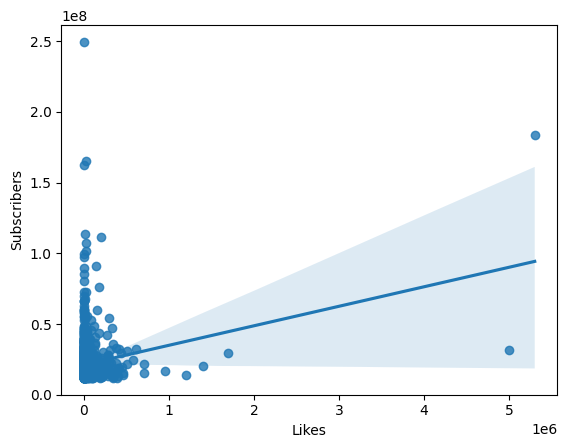

In [11]:
sns.regplot(x="Likes", y="Subscribers", data=df)
plt.ylim(0,)

In [12]:
from scipy import stats

In [13]:
pearson_coef, p_value = stats.pearsonr(df['Likes'], df['Subscribers'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.21163868368008565 with a P-value of P = 1.3708078629804e-11


The p-value is < 0.001, the correlation between likes and subscribers is statistically significant, but the linear relationship is weak.



(0.0, 261390000.0)

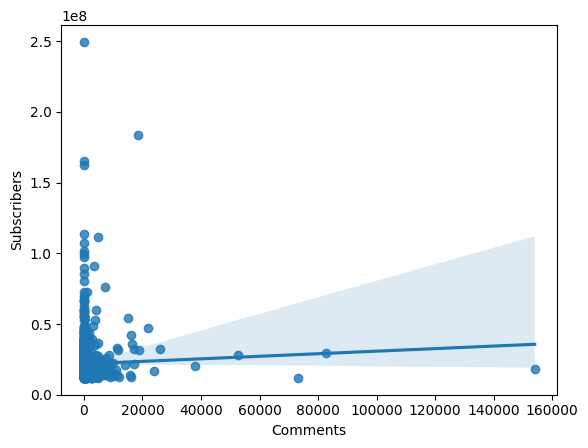

In [14]:
sns.regplot(x="Comments", y="Subscribers", data=df)
plt.ylim(0,)

In [15]:
pearson_coef, p_value = stats.pearsonr(df['Comments'], df['Subscribers'] )
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.03634982616105394 with a P-value of P = 0.25079345261131963


Since the p-value is > 0.001, the correlation between comments and subscribers is statistically not significant, and the linear relationship is weak.


In [16]:
Streamers_audience_country= df[['Visits','Subscribers','Categories','Country']].groupby(['Country','Categories'],as_index=True).max()
Streamers_audience_country.sort_values(by=['Visits','Subscribers'], ascending=False)

Visits  Subscribers
Country        Categories                                         
Estados Unidos Videojuegos, Humor         117400000.0  183500000.0
               Vlogs diarios               83100000.0   31300000.0
               Animación, Humor            52700000.0   34200000.0
               Comida y bebida             21500000.0   21100000.0
               Música y baile              13600000.0   91300000.0
...                                               ...          ...
Turquía        Música y baile                  6100.0   24400000.0
México         Música y baile, Animación       5500.0   21900000.0
Indonesia      Noticias y Política             4400.0   15400000.0
Bangladesh     Noticias y Política             3800.0   14300000.0
Pakistán       Noticias y Política             3600.0   12400000.0

[172 rows x 2 columns]

yes, there are regional preferences for specific content categories.

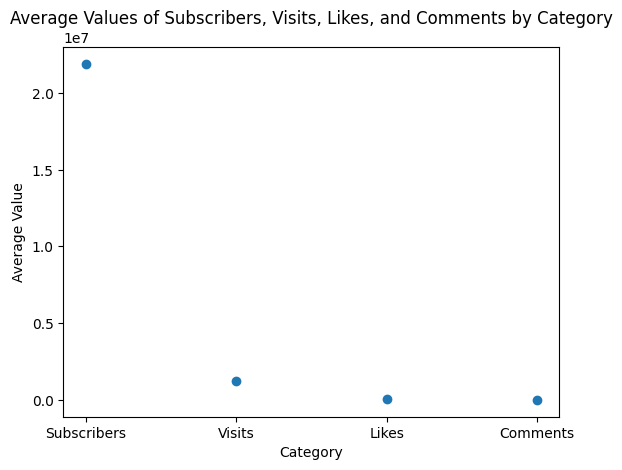

In [17]:
Average_value = df[['Subscribers','Visits','Likes','Comments']].mean(axis=0)
Average_value
plt.scatter(Average_value.index, Average_value.values)
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.title('Average Values of Subscribers, Visits, Likes, and Comments by Category')
plt.show()



The anormaly in this metrics is that, there are more subscribers than actual visits.

In [18]:
streamers_no = df['Categories'].value_counts().sort_values(ascending=False)
streamers_no

,count
Categories,
Música y baile,160
"Películas, Animación",61
"Música y baile, Películas",41
Vlogs diarios,37
Noticias y Política,36
"Películas, Humor",34
"Animación, Videojuegos",34
"Animación, Juguetes",29
"Animación, Humor",27


<Axes: >

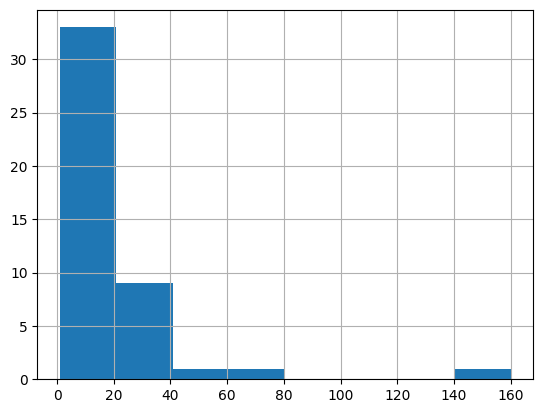

In [19]:
streamers_no.hist(bins=8)

Musica y baile has the highest number of streamers in the categories along with performance metrics.

Also unknown numbers has an exceptional performance metrics.


To analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns can not be determined from the data given.

In [20]:
streamers_avg = df[['Subscribers','Visits','Likes','Comments']].mean()
above_avg = df[df['Subscribers'] > streamers_avg['Subscribers']]
above_avg

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
298,299,williesalim,"Películas, Humor",21900000.0,Indonesia,396200.0,0.0,2800.0,http://youtube.com/channel/UCPCaXSwaos-QI03iZt...
299,300,SMOL_official,NaN,21900000.0,India,114500.0,2600.0,5.0,http://youtube.com/channel/UCBBZ7No0AzEJ3qiatj...
300,301,alfredolarin,NaN,21900000.0,El Salvador,12900000.0,707600.0,2100.0,http://youtube.com/channel/UCd5ApCORQsMOZZz5E9...
301,302,TlnovelasOficial,"Música y baile, Animación",21900000.0,México,5500.0,152.0,5.0,http://youtube.com/channel/UCKyU-wd-KY4PMOcOpP...


The values in the "above_avg" are the top content creators.

In content recommendations, I wouuld propose a system that takes into accounts peoples visits,likes, comments, and subscriptions, tracks them and suggest similar contents based on their preferences.